<a href="https://colab.research.google.com/github/Seb207/Market-Context-Project/blob/main/Irrationality%20Index/Factor_Data_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import datetime
import sys, os
import json

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

from setuptools.command.rotate import rotate

# Factors Used

- Target Price Data: QQQ, SPY, DIA, IWM

- Factor Data:
1. VIX
2. Trading Volume (1w, 1m, 3m, 6m)
3. US 2, 10, 20, 30 year bond yield
4. Rate of Return (1m, 3m, 6m)
5. Small or Large cap rate of return

# Refinitiv Session Manager

In [2]:
import refinitiv.dataplatform as rdp
import refinitiv.data as rd
import datetime as dt

In [3]:
def key_loader(filepath):
    """
    loads app key from the config file

    :param filepath: path for config file
    :return: app_key
    """
    config_file_path = filepath
    try:
        #Open JSON file
        with open(config_file_path, 'r') as f:
            config_data = json.load(f)

        app_key = config_data['sessions']['platform']['rdp']['app-key']

        print(f"Key is successfully loaded")

    except FileNotFoundError:
        print(f"Error: '{config_file_path}' File not found.")

    except KeyError as e:
        print(f"Error: No key {e} in file.")

    return app_key

In [5]:
def check_state(state, message, session):
        print(f"State: {state}")
        print(f"Message: {message}")
        print("\n")

In [6]:
def refinitiv_open_session(filepath):
    """
    function to open Refinitiv API session

    return
    ------
    Refinitiv API session state
    """
    session = rd.session.desktop.Definition(
        app_key=key_loader(filepath)).get_session()
    rd.session.set_default(session)

    session.on_state(check_state)

    session.open()

    return session.open_state, session

In [7]:
def refinitiv_close_session():
    """
    function to close Refinitv API session

    return
    ------
    state: closed session
    """
    session = rd.session.get_default()

    session.on_state(check_state)

    session.close()

    return session.open_state

In [8]:
filepath = 'refinitiv-data.config.json'

In [9]:
refinitiv_open_session(filepath)

Key is successfully loaded
State: OpenState.Pending
Message: Session opening in progress


State: OpenState.Opened
Message: Session is opened




(<OpenState.Opened: 'Opened'>,
 <refinitiv.data.session.Definition object at 0x13194ad90 {name='workspace'}>)

In [240]:
refinitiv_close_session()

State: OpenState.Closed
Message: Session is closed




<OpenState.Closed: 'Closed'>

In [10]:
start = dt.datetime(2014, 12, 31).date()
end = dt.datetime(2024, 12, 31).date()

In [11]:
df = rd.get_history(universe=['QQQ.O', 'IWM', 'NVDA.O'], fields=['BID', 'ASK', 'TR.CLOSE'], interval='1D', start=start, end=end)
df = pd.DataFrame(df)

/Users/ahnsebin/Documents/Personal Project/Quant/Market-Context-Project/.venv/lib/python3.11/site-packages/refinitiv/data/_tools/_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/Users/ahnsebin/Documents/Personal Project/Quant/Market-Context-Project/.venv/lib/python3.11/site-packages/refinitiv/data/_tools/_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-12-31 to 2024-12-31
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (QQQ.O, BID)           2517 non-null   Float64
 1   (QQQ.O, ASK)           2517 non-null   Float64
 2   (QQQ.O, Price Close)   2517 non-null   Float64
 3   (IWM, BID)             2516 non-null   Float64
 4   (IWM, ASK)             2516 non-null   Float64
 5   (IWM, Price Close)     2517 non-null   Float64
 6   (NVDA.O, BID)          2517 non-null   Float64
 7   (NVDA.O, ASK)          2517 non-null   Float64
 8   (NVDA.O, Price Close)  2517 non-null   Float64
dtypes: Float64(9)
memory usage: 218.8 KB


[Refinitiv Data API Reference]

https://cdn.refinitiv.com/public/rd-lib-python-doc/1.0.0.0/book/en/sections/content-layer/historical-pricing/historical-pricing-events/historical-pricing-events-definition.html

# #1 Retrieve Data & Process

1. Data: QQQ
2. Duration: 10-year data (2014.12.31 ~ 2024.12.31)
3. Tick: 1 day, 1 hour, 1 minute
4. Field: Daily --> TR.CLOSE, TR.VOLUME, Min & Hour --> TRDPRC_1 (close price), ACVOL_UNS (volume)


In [164]:
filepath = 'refinitiv-data.config.json'

In [165]:
refinitiv_open_session(filepath)

Key is successfully loaded
State: OpenState.Pending
Message: Session opening in progress


State: OpenState.Opened
Message: Session is opened




(<OpenState.Opened: 'Opened'>,
 <refinitiv.data.session.Definition object at 0x168807f50 {name='workspace'}>)

In [178]:
start = dt.datetime(2014, 12, 31)
end = dt.datetime(2024, 12, 31)

In [13]:
qqq_daily = pd.DataFrame(rd.get_history('QQQ.O', start=start, end=end, interval='1d', fields=['TR.CLOSE']))

In [14]:
qqq_daily.head()

QQQ.O,Price Close
Date,
2014-12-31,103.195794
2015-01-02,102.885957
2015-01-05,101.376749
2015-01-06,100.017463
2015-01-07,101.306786


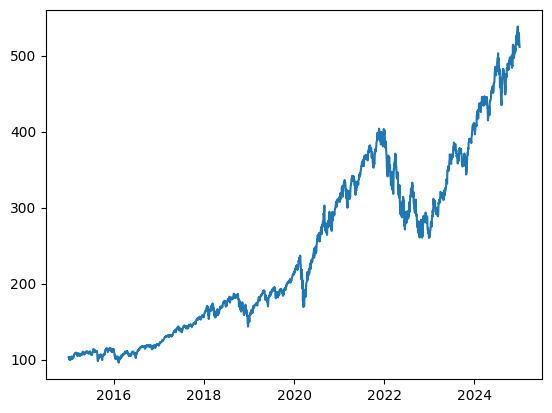

In [15]:
plt.plot(qqq_daily)

In [16]:
qqq_minute = pd.DataFrame(rd.get_history('QQQ.O', start=start, end=end, interval='minute'))

/Users/ahnsebin/Documents/Personal Project/Quant/Market-Context-Project/.venv/lib/python3.11/site-packages/refinitiv/data/_tools/_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


(array([19981., 19997., 20011., 20028., 20042., 20058., 20072., 20089.]),
 [Text(19981.0, 0, '2024-09-15'),
  Text(19997.0, 0, '2024-10-01'),
  Text(20011.0, 0, '2024-10-15'),
  Text(20028.0, 0, '2024-11-01'),
  Text(20042.0, 0, '2024-11-15'),
  Text(20058.0, 0, '2024-12-01'),
  Text(20072.0, 0, '2024-12-15'),
  Text(20089.0, 0, '2025-01-01')])

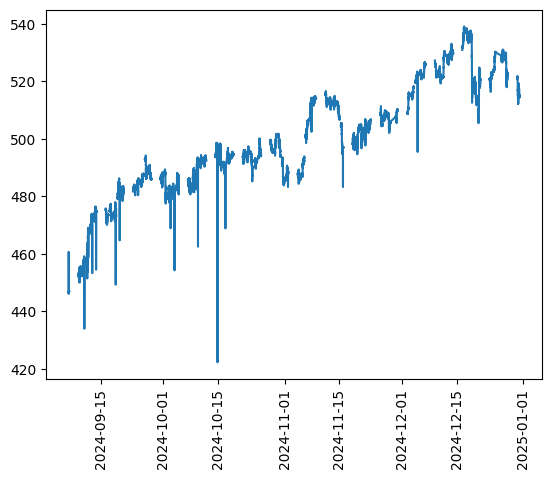

In [17]:
plt.plot(qqq_minute['TRDPRC_1'])
plt.xticks(rotation=90)

In [18]:
qqq_hour = pd.DataFrame(rd.get_history('QQQ.O', start=start, end=dt.datetime.now(), interval='1h'))

/Users/ahnsebin/Documents/Personal Project/Quant/Market-Context-Project/.venv/lib/python3.11/site-packages/refinitiv/data/_tools/_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [19]:
qqq_hour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4215 entries, 2024-09-06 20:00:00 to 2025-09-05 23:00:00
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HIGH_1      3979 non-null   Float64
 1   LOW_1       3979 non-null   Float64
 2   OPEN_PRC    3979 non-null   Float64
 3   TRDPRC_1    3979 non-null   Float64
 4   NUM_MOVES   3979 non-null   Int64  
 5   ACVOL_UNS   3979 non-null   Int64  
 6   HIGH_YLD    236 non-null    Float64
 7   LOW_YLD     236 non-null    Float64
 8   OPEN_YLD    236 non-null    Float64
 9   YIELD       236 non-null    Float64
 10  VWAP        1767 non-null   Float64
 11  BID_HIGH_1  3979 non-null   Float64
 12  BID_LOW_1   3979 non-null   Float64
 13  OPEN_BID    3979 non-null   Float64
 14  BID         3979 non-null   Float64
 15  BID_NUMMOV  3979 non-null   Int64  
 16  ASK_HIGH_1  3979 non-null   Float64
 17  ASK_LOW_1   3979 non-null   Float64
 18  OPEN_ASK    3979 non-null   Floa

(array([20328., 20329., 20330., 20331., 20332., 20333., 20334., 20335.,
        20336., 20337.]),
 [Text(20328.0, 0, '2025-08-28'),
  Text(20329.0, 0, '2025-08-29'),
  Text(20330.0, 0, '2025-08-30'),
  Text(20331.0, 0, '2025-08-31'),
  Text(20332.0, 0, '2025-09-01'),
  Text(20333.0, 0, '2025-09-02'),
  Text(20334.0, 0, '2025-09-03'),
  Text(20335.0, 0, '2025-09-04'),
  Text(20336.0, 0, '2025-09-05'),
  Text(20337.0, 0, '2025-09-06')])

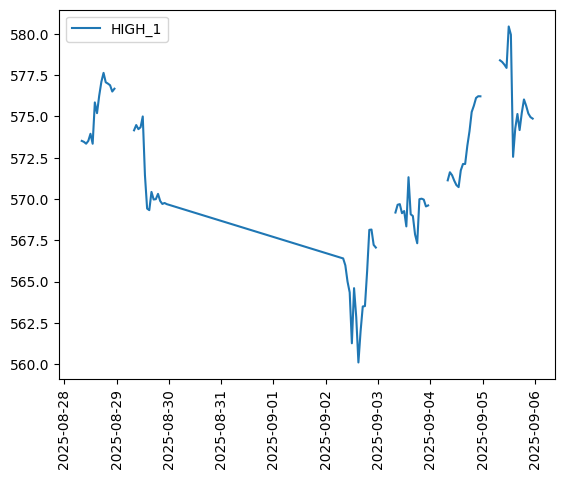

In [20]:
plt.plot(qqq_hour['TRDPRC_1'][-100:])
plt.legend(qqq_hour)
plt.xticks(rotation=90)

In [21]:
qqq_hour_volume = qqq_hour['ACVOL_UNS']
qqq_hour_volume.head()

Timestamp
2024-09-06 20:00:00    199629
2024-09-06 21:00:00    100503
2024-09-06 22:00:00     53853
2024-09-06 23:00:00     59913
2024-09-09 04:00:00      <NA>
Name: ACVOL_UNS, dtype: Int64

(array([20254., 20270., 20284., 20301., 20315., 20332.]),
 [Text(20254.0, 0, '2025-06-15'),
  Text(20270.0, 0, '2025-07-01'),
  Text(20284.0, 0, '2025-07-15'),
  Text(20301.0, 0, '2025-08-01'),
  Text(20315.0, 0, '2025-08-15'),
  Text(20332.0, 0, '2025-09-01')])

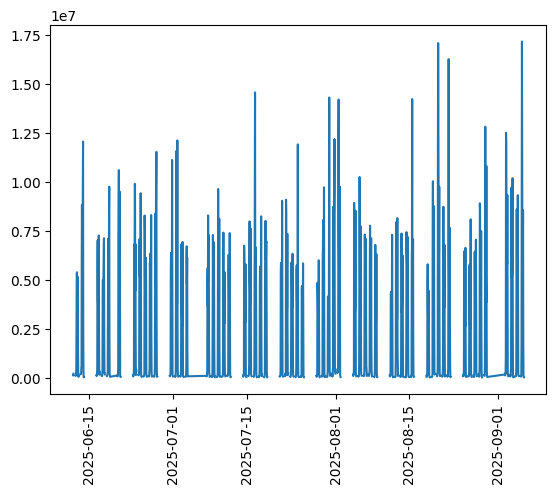

In [22]:
plt.plot(qqq_hour_volume[-1000:])
plt.xticks(rotation=90)

In [23]:
qqq_daily_volume = pd.DataFrame(rd.get_history('QQQ.O', start=start, end=end, interval='daily', fields=['TR.Volume']))
qqq_daily_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  2517 non-null   Int64
dtypes: Int64(1)
memory usage: 41.8 KB


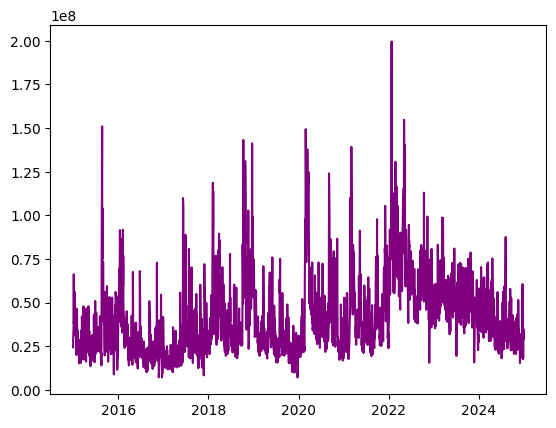

In [24]:
plt.plot(qqq_daily_volume, color='purple')

In [28]:
def price_data_loader(ric, start, end, interval):
    """
    Loads price data according to the arguments

    :param ric: RIC code for the target instrument
    :param start: start date of the data
    :param end: end date of the data
    :param interval: interval of the data
    :return: data_loaded = pd.DataFrame()
    """
    if interval == 'minute' or interval == '1min' or interval == '1h' or interval == '1s':
        data_loaded = pd.DataFrame(rd.get_history(ric, start=start, end=end, interval=interval, fields=['TRDPRC_1']))
    else:
        data_loaded = pd.DataFrame(rd.get_history(ric, start=start, end=end, interval=interval, fields=['TR.CLOSE']))

    return data_loaded

In [26]:
nvda_daily_price = price_data_loader('NVDA.O', start, end, interval='daily')
nvda_daily_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price Close  2517 non-null   Float64
dtypes: Float64(1)
memory usage: 41.8 KB


In [27]:
def volume_data_loader(ric, start, end, interval):
    """
    Loads volume data according to the arguments

    :param ric: RIC code for the target instrument
    :param start: start date of the data
    :param end: end date of the data
    :param interval: interval of the data
    :return: data_loaded = pd.DataFrame()
    """
    if interval == 'minute' or interval == '1min' or interval == '1h' or interval == '1s':
        data_loaded = pd.DataFrame(rd.get_history(ric, start=start, end=end, interval=interval, fields=['ACVOL_UNS']))
    else:
        data_loaded = pd.DataFrame(rd.get_history(ric, start=start, end=end, interval=interval, fields=['TR.Volume']))

    return data_loaded

In [29]:
nvda_daily_volume = volume_data_loader('NVDA.O', start, end, interval='daily')
nvda_daily_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  2517 non-null   Int64
dtypes: Int64(1)
memory usage: 41.8 KB


# #2 Data: US 10-year & 30-year bond yield

In [38]:
us10_daily_price = pd.DataFrame(rd.get_history('US10YT=RR', start=start, end=end, interval='daily', fields=['MID_PRICE']))
us10_daily_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2509 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MID_PRICE  2509 non-null   Float64
dtypes: Float64(1)
memory usage: 41.7 KB


<Axes: xlabel='Date'>

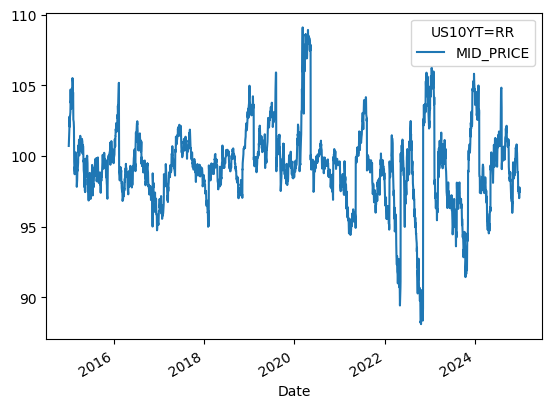

In [39]:
us10_daily_price.plot()

In [40]:
us10_daily_yield = pd.DataFrame(rd.get_history('US10YT=RR', start=start, end=end, interval='daily', fields=['MID_YLD_1']))
us10_daily_yield.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2509 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MID_YLD_1  2509 non-null   Float64
dtypes: Float64(1)
memory usage: 41.7 KB


<Axes: xlabel='Date'>

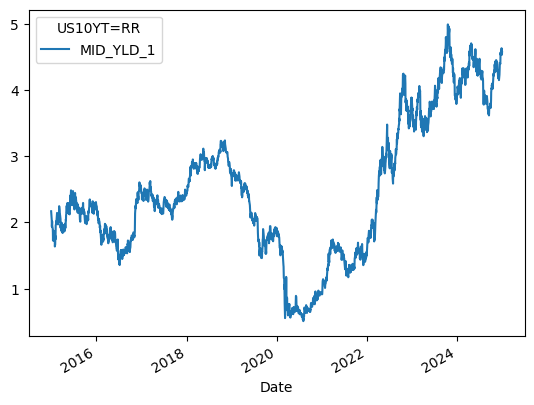

In [41]:
us10_daily_yield.plot()

In [59]:
def fi_data_loader(ric, start, end, interval, if_yield):
    """
    Loads fixed income data according to the arguments
    :param ric: RIC code for the target instrument
    :param start: start date of the data
    :param end: end date of the data
    :param interval: interval of the data
    :param if_yield: boolean whether it is for price or yield
    :return: pd.DataFrame()
    """
    if if_yield:
        field = 'MID_YLD_1'
    else:
        field = 'MID_PRICE'

    data_loaded = pd.DataFrame(rd.get_history(ric, start=start, end=end, interval=interval, fields=[field]))

    return data_loaded

In [60]:
us30_daily_price = fi_data_loader('US30YT=RR', start, end, interval='daily', if_yield=False)
us30_daily_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2508 entries, 2015-01-02 to 2024-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MID_PRICE  2508 non-null   Float64
dtypes: Float64(1)
memory usage: 41.6 KB


<Axes: xlabel='Date'>

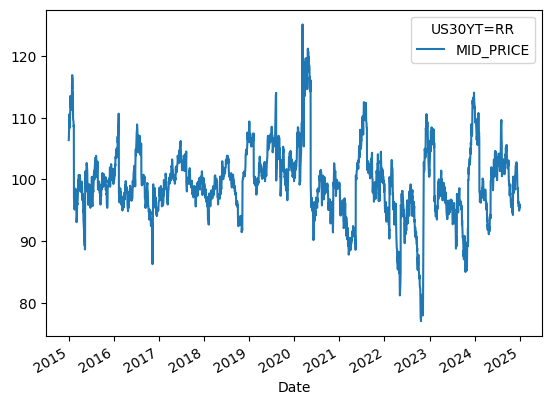

In [61]:
us30_daily_price.plot()

In [62]:
us30_daily_yield = fi_data_loader('US30YT=RR', start, end, interval='daily', if_yield=True)
us30_daily_yield.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2508 entries, 2015-01-02 to 2024-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MID_YLD_1  2508 non-null   Float64
dtypes: Float64(1)
memory usage: 41.6 KB


<Axes: xlabel='Date'>

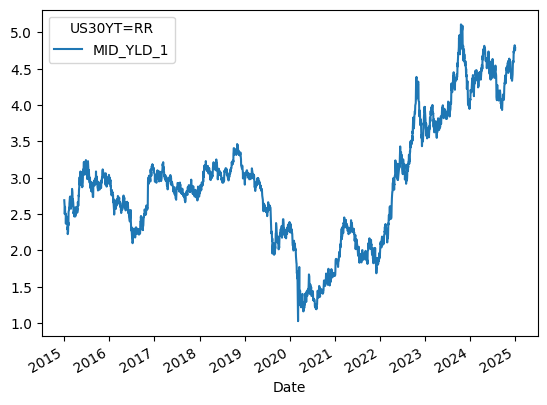

In [63]:
us30_daily_yield.plot()

# #3 Data: IWM

In [48]:
iwm_daily_price = price_data_loader('IWM', start, end, interval='daily')
iwm_daily_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price Close  2517 non-null   Float64
dtypes: Float64(1)
memory usage: 41.8 KB


<Axes: xlabel='Date'>

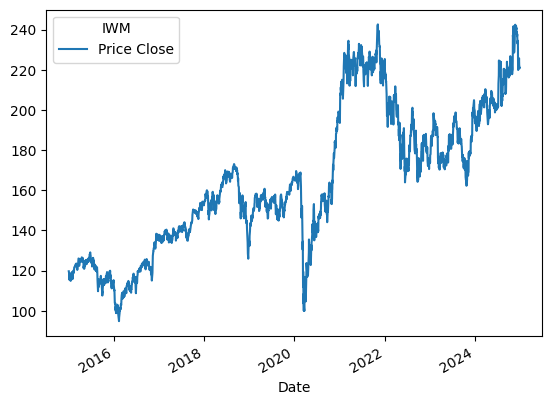

In [49]:
iwm_daily_price.plot()

<Axes: xlabel='Date'>

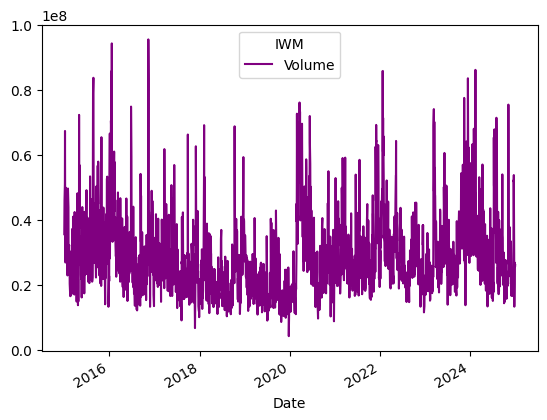

In [51]:
iwm_daily_volume = volume_data_loader('IWM', start, end, interval='daily')
iwm_daily_volume.plot(color='purple')

# #4 Data: SPY

In [52]:
spy_daily_price = price_data_loader('SPY', start, end, interval='daily')
spy_daily_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price Close  2517 non-null   Float64
dtypes: Float64(1)
memory usage: 41.8 KB


<Axes: xlabel='Date'>

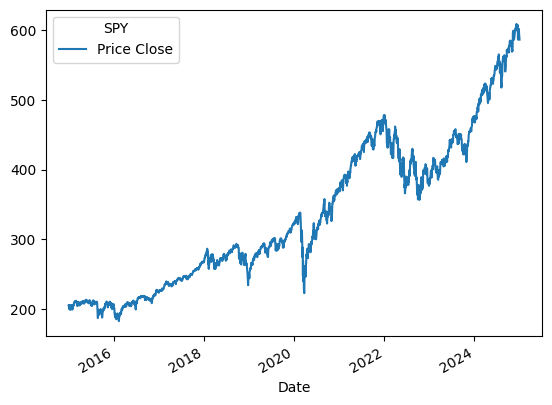

In [53]:
spy_daily_price.plot()

<Axes: xlabel='Date'>

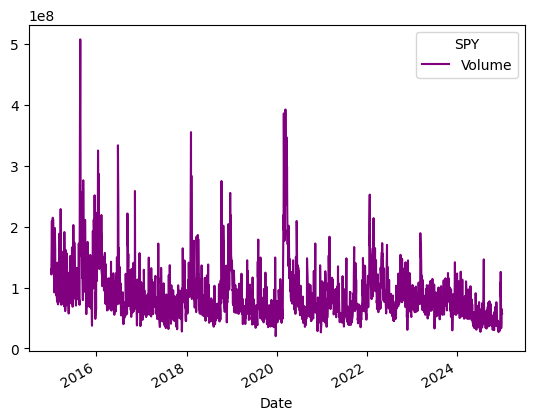

In [54]:
spy_daily_volume = volume_data_loader('SPY', start, end, interval='daily')
spy_daily_volume.plot(color='purple')

# #5 Data: GLD

In [55]:
gld_daily_price = price_data_loader('GLD', start, end, interval='daily')
gld_daily_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price Close  2517 non-null   Float64
dtypes: Float64(1)
memory usage: 41.8 KB


<Axes: xlabel='Date'>

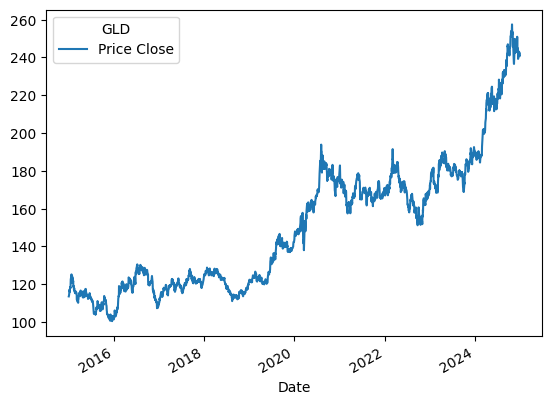

In [56]:
gld_daily_price.plot()

<Axes: xlabel='Date'>

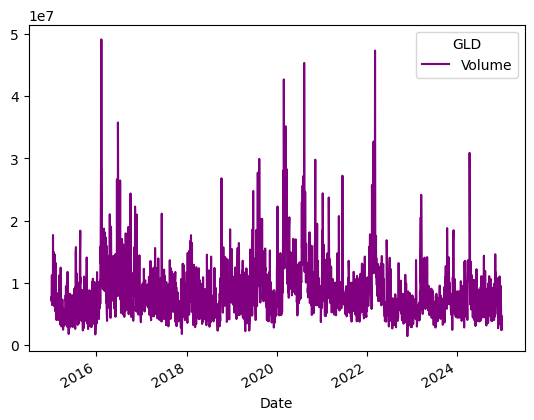

In [57]:
gld_daily_volume = volume_data_loader('GLD', start, end, interval='daily')
gld_daily_volume.plot(color='purple')

# #6 Data: VIX

As this data is not supported on the current Refinitiv API plan, it will use fred for data source.

In [64]:
import pandas_datareader as pdr

In [67]:
vix_daily = pdr.get_data_fred('VIXCLS', start, end)
vix_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2014-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VIXCLS  2536 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


<Axes: xlabel='DATE'>

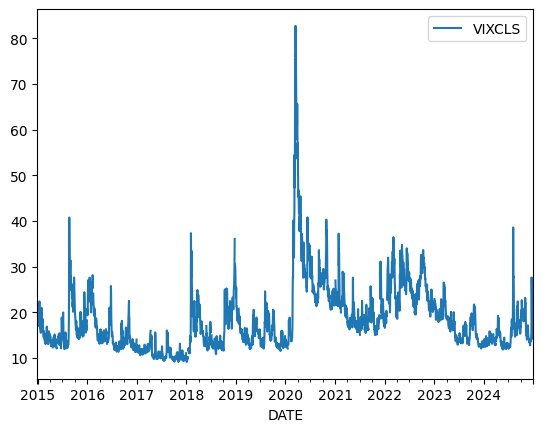

In [68]:
vix_daily.plot()

# Visualization

1. Single time series data graph
2. Multiple data in a graph
3. Multiple graphs

# Train/Dev/Test Data Distribution

Hypothesis 1:

1. Entire dataset amount:
2. Train/Dev/Test Ratio: